In [15]:
import pickle
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
pickle_name = "./Results/Run39/Results_final_pickle.pkl"
# pickle_name = "./Results/Run23/Results29_pickle.pkl"

with open(pickle_name, 'rb') as handle:
    dict_data = pickle.load(handle)
df = pd.DataFrame.from_dict(dict_data)

In [5]:
df.sort_values(['Performance'], ascending=[False],inplace=True)
df['ratio n1/b1'] = df['n1'] /df['b1'] 
df['ratio n2/b2'] = df['n2'] /df['b2'] 
df['ratio n3/b3'] = df['n3'] /df['b3'] 

df

,Epoch,Ant,Performance,init,n1,n2,n3,simd,Olevel,num_thread,b1,b2,b3,ratio n1/b1,ratio n2/b2,ratio n3/b3
3899,26,0,1565.94,init,512,512,1024,avx512,-Ofast,16,480,16,48,1.066667,32.000000,21.333333
6149,41,0,1530.70,init,512,512,1024,avx2,-O2,16,480,16,80,1.066667,32.000000,12.800000
4799,32,0,1526.46,init,512,512,1024,avx,-O3,16,480,16,128,1.066667,32.000000,8.000000
4800,32,1,1515.97,init,512,512,1024,avx512,-O2,16,480,16,128,1.066667,32.000000,8.000000
5249,35,0,1511.87,init,512,512,1024,avx2,-O2,16,480,16,96,1.066667,32.000000,10.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,149,347.71,init,512,512,1024,avx,-O2,16,16,464,64,32.000000,1.103448,16.000000
5098,33,149,343.86,init,512,512,1024,avx2,-Ofast,16,32,288,288,16.000000,1.777778,3.555556
147,0,147,342.63,init,512,512,1024,avx512,-O2,16,16,512,288,32.000000,1.000000,3.555556
148,0,148,341.53,init,512,512,1024,avx512,-O3,16,32,288,272,16.000000,1.777778,3.764706


In [45]:
def pop_std(x):
    return x.std(ddof=0)

df_stat = df[['Epoch', 'Performance']].groupby(['Epoch'], as_index=True).agg({'Performance':['mean',pop_std,'min','max']}).reset_index()

df_stat.columns = ['Epoch','Avg Performance', 'Std','min','max']


In [46]:
df_stat

,Epoch,Avg Performance,Std,min,max
0,0,636.304698,227.193437,341.53,1280.83
1,1,698.885867,215.549500,347.71,1205.24
2,2,817.573533,208.083561,378.70,1248.14
3,3,915.639733,173.052142,427.61,1298.69
4,4,997.618267,163.075263,419.95,1267.07
5,5,1061.308467,148.438382,494.79,1278.44
6,6,1117.605667,130.348976,437.17,1341.24
7,7,1145.444467,130.188222,466.96,1437.97
8,8,1162.124333,120.593076,362.95,1398.94
9,9,1175.380933,108.980323,504.96,1417.67


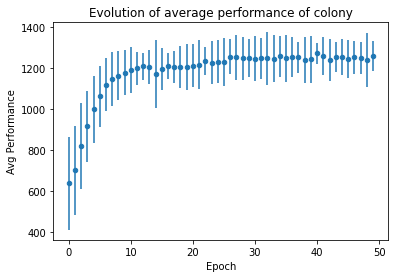

In [30]:
df_stat.plot(x ='Epoch', y='Avg Performance', kind = 'scatter',legend=False,yerr = "Std")


plt.title('Evolution of average performance of colony')
plt.show()

AttributeError: 'Figure' object has no attribute 'subtitle'

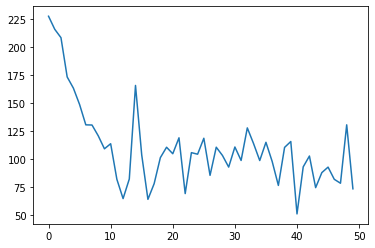

In [43]:
fig, ax = plt.subplots()
ax.plot(df_stat['Epoch'], df_stat['Std'])

ax.fill_between(df_stat['Epoch'], df_stat['Avg Performance']-df_stat['Std'], df_stat['Avg Performance']+df_stat['Std'] ,alpha=0.3)
fig.subtitle('Evolution of average performance of colony')




In [42]:
df_best = df[['Epoch', 'Performance']].groupby(['Epoch'], as_index=True).max().reset_index()

In [40]:
df_best

,Performance
Epoch,
0,1280.83
1,1205.24
2,1248.14
3,1298.69
4,1267.07
5,1278.44
6,1341.24
7,1437.97
8,1398.94


KeyError: 'Epoch'

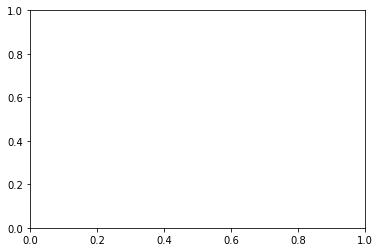

In [41]:
fig, ax = plt.subplots()
ax.plot(df_best['Epoch'], df_best['Performance'])